ДЗ за день до дедлайна? Классика.

Начнем с условий!

# Домашнее задание №4

# Введение

Целью данного задания является сравнение RNA-seq данных перепрограммированных и неперепрограммированных (контрольных) мышиных эмбриональных фибробластов (MEFs) и нахождение генов, которые наиболее сильно изменяют свою экспрессию в этом процессе.

# Обязательная часть задания (8 баллов)

- На сайте github.com создаем **приватный** репозиторий «hse23\_hw4» и приводим ссылку на этот репозиторий в общей гугл-таблице ( **вкладка HW4** ) [https://docs.google.com/spreadsheets/d/1HItcZ\_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1HItcZ_5Z4ETo9M5MsVOE3gqNPdFEWLsyM6j1t09fwec/edit?usp=sharing)
  - Также необходимо дать доступ ассистенту к репозиторию для будущей проверки (Settings =\> Collaborators =\> Add people):
![](RackMultipart20231125-1-xkm74j_html_7563f38078fb9535.png)
- Рекомендуется выполнять работу в Google Colab ноутбуках.
  - Если вы будете выполнять работу на сервере или на своем компьютере, необходимо будет также загрузить написанный код на Github
- В данном задании будут проанализированы следующие 6 RNA-seq образцов:
  - Перепрограммированные образцы: SRR3414629, SRR3414630, SRR3414631
  - Контрольные образцы: SRR3414635, SRR3414636, SRR3414637
- Выравнивание RNA-seq чтений на геном мыши:
  - Пример Google Colab ноутбука с примерами запуска только для одного файла (образца). **Вам следует сделать это для всех 6-ти файлов**.
  - [https://colab.research.google.com/drive/120VEu4Rzv0qVRMsNH-Fy86hG0YjvORpJ?usp=sharing](https://colab.research.google.com/drive/120VEu4Rzv0qVRMsNH-Fy86hG0YjvORpJ?usp=sharing)
  - Результатом этой части задания будет сводная таблица ALL.counts, где указано кол-во чтений уникально картированных на каждый ген в каждом образце следующего вида:

![](RackMultipart20231125-1-xkm74j_html_c0c6351ebd1fae3.png)

# Бонусная часть задания 1 (2 балла)

- Поиск генов, которые значимо поменяли свою экспрессию (дифференциально-экспрессированные гены) в результате перепрограммирования с помощью R-пакета DESeq2
  - Пример Google Colab ноутбука на R [https://colab.research.google.com/drive/1OAlyTlVFBCllorI9mBfgj0Avg76ZHNJK?usp=sharing](https://colab.research.google.com/drive/1OAlyTlVFBCllorI9mBfgj0Avg76ZHNJK?usp=sharing)
  - Для этой части задания потребуется файл ALL.counts (созданный выше), а также небольшой файл ALL.info с информацией по каждому образцу следующего вида

![](RackMultipart20231125-1-xkm74j_html_d94c0c254c944eb9.png)

# Список файлов для сдачи

- В репозитории в файле _README_.md
  - Ссылки на google colab ноутбуки
  - Скриншоты и статистика из файлов FastQC или multiQC
  - Таблицу со статистикой по каждому из 6-ти образцов:
    - ID образца
    - Тип образца (перепрограммированние или контроль)
    - Общее кол-во исходных чтений
    - Кол-во и процент чтений, которые были успешно откартированы на геном (уникально или нет)
    - Кол-во и процент уникально откартированных чтений
    - Общее кол-во чтений, которые попали на гены
  - Графики из анализа DESeq2 (бонус)
    - MA-plot
    - Тепловая карта, которая показывает, что все контрольные образцы похожи между собой, а перепрограммированные образцы -- между собой
    - Для нескольких генов, которые наиболее значимо поменяли свою экспрессию -- графики со значениями "Normalized counts" в контрольных и перепрограммированных образцах
- В репозитории в папке data
  - Файл ALL.counts -- сводная таблица, где указано кол-во чтений уникально картированных на каждый ген в каждом образце
  - Файл differentially\_expressed\_genes.txt -- результат работы DESeq2 для всех генов
- В репозитории в папке src – любой другой код, который был использован для выполнения задания

# Форма отчетности

Github репозиторий, содержащий все полученные результаты.

**Последний срок сдачи: 26 ноября до 23:59 (будет отслеживаться по последнему коммиту в репозиторий).**

**В случае возникновения вопросов пишите на Telegram ассистента (или в общий чат курса).**

# Подготовка файлов и программ

## Установка HISAT2 (для выравниваия RNA-seq чтений на геном)

In [1]:
!apt-get update
!apt-get install hisat2
!hisat2 --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,016 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,244 kB]
Get:13 http://archive.ubuntu.com/ubunt

## Установка sra-toolkit (для скачивания .fastq файлов из NCBI)

In [2]:
!apt-get install sra-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu sra-toolkit
0 upgraded, 7 newly installed, 0 to remove and 32 not upgraded.
Need to get 8,290 kB of archives.
After this operation, 23.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 menu amd64 2.1.47ubuntu4 [354 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 blends-common all 0.7.4ubuntu1 [15.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libkdf5-2 amd64 2.11.2+dfsg-4build2 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libncbi-vdb2 amd64 2.11.2+dfsg-4build2 [1,364 kB]
Get:5

## Установка FastQC

In [3]:
!java -version
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc
!./FastQC/fastqc --help

openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
--2023-11-26 07:30:30--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  4.27MB/s    in 2.3s    

2023-11-26 07:30:34 (4.27 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/conta

## Установка HTSeq-count

In [4]:
!pip install HTSeq
!htseq-count --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 56.4 MB/s eta 0:00:00
2.0.4


## Установка MultiQC

In [5]:
!pip install multiqc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for spectra: filename=spectra-0.0.11-py3-none-any.whl size=17467 sha256=6c3df8b5eaf40ec498c2add2ec5fc18ecbac770975272b65142d9e783744e90a
  Stored in directory: /root/.cache/pip/wheels/bc/27/ec/cddaa9489a49ddcf702e1f4dc1791db28a3b0121e1ff254f97
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=7a3b317ce592e42be04839b48aa2d661a87d8e327e0144c27a0ea04e4c6a629d
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built spectra colormath


## Скачиваем RNA-seq данные и выравниваем их

* Перепрограммированные образцы: 	SRR3414629, SRR3414630, SRR3414631
* Контрольные образцы:		SRR3414635, SRR3414636, SRR3414637

In [6]:
!time  fastq-dump  --split-files  SRR3414629
!./FastQC/fastqc  /content/SRR3414629_1.fastq

!time  fastq-dump  --split-files  SRR3414630
!./FastQC/fastqc  /content/SRR3414630_1.fastq

!time  fastq-dump  --split-files  SRR3414631
!./FastQC/fastqc  /content/SRR3414631_1.fastq

!time  fastq-dump  --split-files  SRR3414635
!./FastQC/fastqc  /content/SRR3414635_1.fastq

!time  fastq-dump  --split-files  SRR3414636
!./FastQC/fastqc  /content/SRR3414636_1.fastq

!time  fastq-dump  --split-files  SRR3414637
!./FastQC/fastqc  /content/SRR3414637_1.fastq

!multiqc . --filename concatenated_report.html

Read 21106089 spots for SRR3414629
Written 21106089 spots for SRR3414629

real	9m50.174s
user	3m24.699s
sys	0m10.195s
Started analysis of SRR3414629_1.fastq
Approx 5% complete for SRR3414629_1.fastq
Approx 10% complete for SRR3414629_1.fastq
Approx 15% complete for SRR3414629_1.fastq
Approx 20% complete for SRR3414629_1.fastq
Approx 25% complete for SRR3414629_1.fastq
Approx 30% complete for SRR3414629_1.fastq
Approx 35% complete for SRR3414629_1.fastq
Approx 40% complete for SRR3414629_1.fastq
Approx 45% complete for SRR3414629_1.fastq
Approx 50% complete for SRR3414629_1.fastq
Approx 55% complete for SRR3414629_1.fastq
Approx 60% complete for SRR3414629_1.fastq
Approx 65% complete for SRR3414629_1.fastq
Approx 70% complete for SRR3414629_1.fastq
Approx 75% complete for SRR3414629_1.fastq
Approx 80% complete for SRR3414629_1.fastq
Approx 85% complete for SRR3414629_1.fastq
Approx 90% complete for SRR3414629_1.fastq
Approx 95% complete for SRR3414629_1.fastq
Analysis complete for SRR34

## Скачиваем геном мыши mm10 (проиндексированный для HISAT2)

In [7]:
!wget https://genome-idx.s3.amazonaws.com/hisat/mm10_genome.tar.gz

--2023-11-26 08:40:34--  https://genome-idx.s3.amazonaws.com/hisat/mm10_genome.tar.gz
Resolving genome-idx.s3.amazonaws.com (genome-idx.s3.amazonaws.com)... 3.5.28.149, 52.217.197.73, 3.5.1.216, ...
Connecting to genome-idx.s3.amazonaws.com (genome-idx.s3.amazonaws.com)|3.5.28.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3804366597 (3.5G) [binary/octet-stream]
Saving to: ‘mm10_genome.tar.gz’

mm10_genome.tar.gz  100%[===================>]   3.54G  14.3MB/s    in 4m 27s  

2023-11-26 08:45:03 (13.6 MB/s) - ‘mm10_genome.tar.gz’ saved [3804366597/3804366597]



In [8]:
!tar -xzvf mm10_genome.tar.gz

mm10/
mm10/genome.8.ht2
mm10/genome.5.ht2
mm10/make_mm10.sh
mm10/genome.7.ht2
mm10/genome.6.ht2
mm10/genome.4.ht2
mm10/genome.3.ht2
mm10/genome.1.ht2
mm10/genome.2.ht2


## Скачиваем аннотацию генов GENCODE для генома мыши mm10

In [9]:
!wget http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.annotation.gtf.gz

--2023-11-26 08:45:59--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... Read error (Connection reset by peer) in headers.
Retrying.

--2023-11-26 08:46:01--  (try: 2)  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.annotation.gtf.gz
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28542432 (27M) [application/x-gzip]
Saving to: ‘gencode.vM25.annotation.gtf.gz’

gencode.vM25.annota 100%[===================>]  27.22M   282KB/s    in 1m 42s  

2023-11-26 08:47:43 (273 KB/s) - ‘gencode.vM25.annotation.gtf.gz’ saved [28542432/28542432]



In [10]:
!gzip -d gencode.vM25.annotation.gtf.gz

## Перед отбором чтений скачаем объединенный отчет MultiQC!

In [11]:
from google.colab import files

!zip -r /content/concatenated_report_data.zip /content/concatenated_report_data
files.download('concatenated_report_data.zip')
files.download('concatenated_report.html')

  adding: content/concatenated_report_data/ (stored 0%)
  adding: content/concatenated_report_data/multiqc.log (deflated 65%)
  adding: content/concatenated_report_data/multiqc_general_stats.txt (deflated 65%)
  adding: content/concatenated_report_data/multiqc_sources.txt (deflated 71%)
  adding: content/concatenated_report_data/multiqc_data.json (deflated 92%)
  adding: content/concatenated_report_data/multiqc_fastqc.txt (deflated 71%)
  adding: content/concatenated_report_data/multiqc_citations.txt (deflated 29%)
  adding: content/concatenated_report_data/multiqc_software_versions.txt (deflated 11%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Отбор чтений

## При помощи HISAT2 будем картировать чтения на геном мыши. После чего отбираем чтения, которые откартировались уникально!

После картирования можно удалить файлы .hisat, .fastq, .sam так как они не нужны более, а месту на диске плохо(

  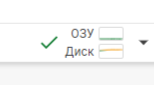

In [12]:
# Картируем чтения
!time hisat2 -p 3 -x mm10/genome -U SRR3414629_1.fastq -S SRR3414629_1.sam  2>  SRR3414629.hisat
# Отбираем уникальные чтения
!grep -P '^@|NH:i:1$' SRR3414629_1.sam > SRR3414629.uniq.sam
# Удаляем исходные .sam файлы
!rm -v SRR3414629_1.sam
# Считаем кол-во уникально-картированных чтений
!grep -v '^@' SRR3414629.uniq.sam | wc -l


real	15m35.460s
user	23m0.764s
sys	1m42.652s
removed 'SRR3414629_1.sam'
18573565


In [13]:
# Удаляем .hisat и .fastq
!cat SRR3414629.hisat
!rm SRR3414629.hisat
!rm SRR3414629_1.fastq

21106089 reads; of these:
  21106089 (100.00%) were unpaired; of these:
    241118 (1.14%) aligned 0 times
    18573565 (88.00%) aligned exactly 1 time
    2291406 (10.86%) aligned >1 times
98.86% overall alignment rate


## Аналогичные действия проделываем для остальных образцов

## SRR3414630:

In [14]:
!time hisat2 -p 3 -x mm10/genome -U SRR3414630_1.fastq -S SRR3414630_1.sam  2>  SRR3414630.hisat
!grep -P '^@|NH:i:1$' SRR3414630_1.sam > SRR3414630.uniq.sam
!rm -v SRR3414630_1.sam
!grep -v '^@' SRR3414630.uniq.sam | wc -l


real	11m16.214s
user	16m30.218s
sys	1m14.022s
removed 'SRR3414630_1.sam'
13320505


In [15]:
!cat SRR3414630.hisat
!rm SRR3414630.hisat
!rm SRR3414630_1.fastq

15244711 reads; of these:
  15244711 (100.00%) were unpaired; of these:
    168274 (1.10%) aligned 0 times
    13320505 (87.38%) aligned exactly 1 time
    1755932 (11.52%) aligned >1 times
98.90% overall alignment rate


## SRR3414631:

In [16]:
!time hisat2 -p 3 -x mm10/genome -U SRR3414631_1.fastq -S SRR3414631_1.sam  2>  SRR3414631.hisat
!grep -P '^@|NH:i:1$' SRR3414631_1.sam > SRR3414631.uniq.sam
!rm -v SRR3414631_1.sam
!grep -v '^@' SRR3414631.uniq.sam | wc -l


real	18m7.731s
user	26m43.959s
sys	1m58.104s
removed 'SRR3414631_1.sam'
21159606


In [17]:
!cat SRR3414631.hisat
!rm SRR3414631.hisat
!rm SRR3414631_1.fastq

24244069 reads; of these:
  24244069 (100.00%) were unpaired; of these:
    279694 (1.15%) aligned 0 times
    21159606 (87.28%) aligned exactly 1 time
    2804769 (11.57%) aligned >1 times
98.85% overall alignment rate


## SRR3414635:

In [18]:
!time hisat2 -p 3 -x mm10/genome -U SRR3414635_1.fastq -S SRR3414635_1.sam  2>  SRR3414635.hisat
!grep -P '^@|NH:i:1$' SRR3414635_1.sam > SRR3414635.uniq.sam
!rm -v SRR3414635_1.sam
!grep -v '^@' SRR3414635.uniq.sam | wc -l


real	15m7.340s
user	22m10.034s
sys	1m39.660s
removed 'SRR3414635_1.sam'
18637053


In [19]:
!cat SRR3414635.hisat
!rm SRR3414635.hisat
!rm SRR3414635_1.fastq

20956475 reads; of these:
  20956475 (100.00%) were unpaired; of these:
    242044 (1.15%) aligned 0 times
    18637053 (88.93%) aligned exactly 1 time
    2077378 (9.91%) aligned >1 times
98.85% overall alignment rate


## SRR3414636:

In [20]:
!time hisat2 -p 3 -x mm10/genome -U SRR3414636_1.fastq -S SRR3414636_1.sam  2>  SRR3414636.hisat
!grep -P '^@|NH:i:1$' SRR3414636_1.sam > SRR3414636.uniq.sam
!rm -v SRR3414636_1.sam
!grep -v '^@' SRR3414636.uniq.sam | wc -l


real	14m41.452s
user	21m35.023s
sys	1m38.047s
removed 'SRR3414636_1.sam'
18032679


In [21]:
!cat SRR3414636.hisat
!rm SRR3414636.hisat
!rm SRR3414636_1.fastq

20307147 reads; of these:
  20307147 (100.00%) were unpaired; of these:
    233551 (1.15%) aligned 0 times
    18032679 (88.80%) aligned exactly 1 time
    2040917 (10.05%) aligned >1 times
98.85% overall alignment rate


## SRR3414637:

In [22]:
!time hisat2 -p 3 -x mm10/genome -U SRR3414637_1.fastq -S SRR3414637_1.sam  2>  SRR3414637.hisat
!grep -P '^@|NH:i:1$' SRR3414637_1.sam > SRR3414637.uniq.sam
!rm -v SRR3414637_1.sam
!grep -v '^@' SRR3414637.uniq.sam | wc -l


real	14m43.259s
user	21m38.286s
sys	1m37.749s
removed 'SRR3414637_1.sam'
18043406


In [23]:
!cat SRR3414637.hisat
!rm SRR3414637.hisat
!rm SRR3414637_1.fastq

20385570 reads; of these:
  20385570 (100.00%) were unpaired; of these:
    236895 (1.16%) aligned 0 times
    18043406 (88.51%) aligned exactly 1 time
    2105269 (10.33%) aligned >1 times
98.84% overall alignment rate


## Теперь через HTSeq подсчитываем количество чтений, попавших на каждый ген

In [24]:
!time htseq-count --format=sam --stranded=no SRR3414629.uniq.sam  gencode.vM25.annotation.gtf > SRR3414629.counts
!time htseq-count --format=sam --stranded=no SRR3414630.uniq.sam  gencode.vM25.annotation.gtf > SRR3414630.counts
!time htseq-count --format=sam --stranded=no SRR3414631.uniq.sam  gencode.vM25.annotation.gtf > SRR3414631.counts
!time htseq-count --format=sam --stranded=no SRR3414635.uniq.sam  gencode.vM25.annotation.gtf > SRR3414635.counts
!time htseq-count --format=sam --stranded=no SRR3414636.uniq.sam  gencode.vM25.annotation.gtf > SRR3414636.counts
!time htseq-count --format=sam --stranded=no SRR3414637.uniq.sam  gencode.vM25.annotation.gtf > SRR3414637.counts

100000 GFF lines processed.
200000 GFF lines processed.
300000 GFF lines processed.
400000 GFF lines processed.
500000 GFF lines processed.
600000 GFF lines processed.
700000 GFF lines processed.
800000 GFF lines processed.
900000 GFF lines processed.
1000000 GFF lines processed.
1100000 GFF lines processed.
1200000 GFF lines processed.
1300000 GFF lines processed.
1400000 GFF lines processed.
1500000 GFF lines processed.
1600000 GFF lines processed.
1700000 GFF lines processed.
1800000 GFF lines processed.
1872052 GFF lines processed.
100000 alignment records processed.
200000 alignment records processed.
300000 alignment records processed.
400000 alignment records processed.
500000 alignment records processed.
600000 alignment records processed.
700000 alignment records processed.
800000 alignment records processed.
900000 alignment records processed.
1000000 alignment records processed.
1100000 alignment records processed.
1200000 alignment records processed.
1300000 alignment recor

## Ура, после двух часов мук давайте посмотрим, сколько чтений не удалось приписать ни одному гену

* `__no_feature ` – столько чтений соответствует участкам генома, где не аннотировано ни одного экзона
* `__ambiguous ` – столько чтений могут принадлежать разным генам




In [25]:
! grep '^__' SRR3414629.counts

__no_feature	1620359
__ambiguous	728893
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


In [26]:
! grep '^__' SRR3414630.counts

__no_feature	1251763
__ambiguous	484967
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


In [27]:
! grep '^__' SRR3414631.counts

__no_feature	1718354
__ambiguous	827751
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


In [28]:
! grep '^__' SRR3414635.counts

__no_feature	1406679
__ambiguous	767361
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


In [29]:
! grep '^__' SRR3414636.counts

__no_feature	1347210
__ambiguous	742802
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


In [30]:
! grep '^__' SRR3414637.counts

__no_feature	1411488
__ambiguous	717538
__too_low_aQual	0
__not_aligned	0
__alignment_not_unique	0


* Объединям все файлы .counts по генам в один общий файл `ALL.counts`.
* В качестве заголовка для каждого образца указывать не его SRR id, а c1, c2, c3 для контрольных образцов и r1, r2, r3 для перепрограммированных образцов.
* Загружаем полученный ALL.counts файл в Github репозиторий

## А также выведем общее количество чтений для каждой последовательности

In [35]:
print(f"SRR3414629: {18573565 - 1620359 - 728893 = }")
print(f"SRR3414630: {13320505 - 1251763 - 484967 = }")
print(f"SRR3414631: {21159606 - 1718354 - 827751 = }")
print(f"SRR3414635: {18637053 - 1406679 - 767361 = }")
print(f"SRR3414636: {18032679 - 1347210 - 742802 = }")
print(f"SRR3414637: {18043406 - 1411488 - 717538 = }")

SRR3414629: 18573565 - 1620359 - 728893 = 16224313
SRR3414630: 13320505 - 1251763 - 484967 = 11583775
SRR3414631: 21159606 - 1718354 - 827751 = 18613501
SRR3414635: 18637053 - 1406679 - 767361 = 16463013
SRR3414636: 18032679 - 1347210 - 742802 = 15942667
SRR3414637: 18043406 - 1411488 - 717538 = 15914380


 ## Теперь объединяем все файлы .counts по генам в один общий файл ALL.counts.

In [31]:
import pandas as pd

file_prefixes = ['SRR3414635', 'SRR3414636', 'SRR3414637', 'SRR3414629', 'SRR3414630', 'SRR3414631']
column_names = ['geneID', 'c1', 'c2', 'c3', 'r1', 'r2', 'r3']

dfs = [pd.read_csv(f'{prefix}.counts', sep="\t", names=['geneID', prefix]) for prefix in file_prefixes]
merged_df = pd.concat(dfs, axis=1)

all_counts = merged_df[:-5]

Ура! Качаем `ALL.counts`..

In [32]:
from google.colab import files

all_counts.to_csv('ALL.counts')
files.download('ALL.counts')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>